In [1]:
# data manipulation 
import numpy as np
import pandas as pd

from datetime import datetime
import itertools

# data visualization 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

from sklearn.model_selection import TimeSeriesSplit

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import acquire
import prepare

df = acquire.get_all_data()
df.head()

,item_id,sale_amount,sale_date,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


In [2]:
store= prepare.prep_store_data(df)

#### Using your store items data you prepped in lesson 2 exercises:

###### Split your data into train and test using the sklearn.model_selection.TimeSeriesSplit method.
###### Validate your splits by plotting X_train and y_train.
###### Plot the weekly average & the 7-day moving average. Compare the 2 plots.
###### Plot the daily difference. Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.
###### Plot a time series decomposition.
###### Create a lag plot (day over day).
###### Run a lag correlation.

In [3]:
store.head()

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,weekday,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,01-Jan,2-Tue,10.92
2013-01-01 00:00:00+00:00,17,26.0,295813,3,Ducal,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,TX,78201,01-Jan,2-Tue,30.16
2013-01-01 00:00:00+00:00,7,32.0,125995,10,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,TX,78231,01-Jan,2-Tue,308.48
2013-01-01 00:00:00+00:00,18,45.0,314073,3,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,TX,78201,01-Jan,2-Tue,197.55
2013-01-01 00:00:00+00:00,19,34.0,332333,3,Careone,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,TX,78201,01-Jan,2-Tue,25.16


Split your data into train and test using the sklearn.model_selection.TimeSeriesSplit method

In [14]:
store = store.sale_amount.resample('D').sum().reset_index()
X = store.sale_date
y = store.sale_amount

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [15]:
tss = TimeSeriesSplit(n_splits=5, max_train_size=None)
for train_index, test_index in tss.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244

In [16]:
print(X_train.tail())
print(X_test.head())
print(X_test.tail())

1517   2017-02-26 00:00:00+00:00
1518   2017-02-27 00:00:00+00:00
1519   2017-02-28 00:00:00+00:00
1520   2017-03-01 00:00:00+00:00
1521   2017-03-02 00:00:00+00:00
Name: sale_date, dtype: datetime64[ns, GMT]
1522   2017-03-03 00:00:00+00:00
1523   2017-03-04 00:00:00+00:00
1524   2017-03-05 00:00:00+00:00
1525   2017-03-06 00:00:00+00:00
1526   2017-03-07 00:00:00+00:00
Name: sale_date, dtype: datetime64[ns, GMT]
1821   2017-12-27 00:00:00+00:00
1822   2017-12-28 00:00:00+00:00
1823   2017-12-29 00:00:00+00:00
1824   2017-12-30 00:00:00+00:00
1825   2017-12-31 00:00:00+00:00
Name: sale_date, dtype: datetime64[ns, GMT]


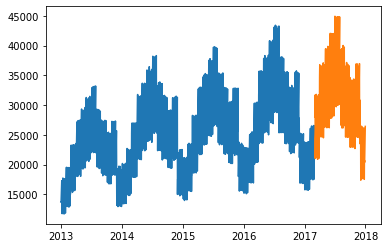

In [17]:
plt.plot(X_train, y_train)
plt.plot(X_test, y_test)

In [18]:
aggregation = 'sum'

train = df[:'2016'].sale_amount.resample('D').agg(aggregation)
test = df['2017':].sale_amount.resample('D').agg(aggregation)

print('Observations: %d' % (len(train.values) + len(test.values)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.numeric.Int64Index'> with these indexers [2016] of <class 'str'>

In [13]:
pd.concat([train.head(3), train.tail(3)])

NameError: name 'train' is not defined